## Data Extraction

This section focuses on scraping used car data from the Hatla2ee website for the Egyptian market. We will use Selenium to navigate the website and BeautifulSoup (implicitly via Selenium's find methods) to extract relevant information for each car listing across multiple pages.

In [ ]:
#!pip install selenium

   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.4 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.4 MB 3.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.4 MB 3.4 MB/s eta 0:00:03
   ----------- ---------------------------- 2.6/9.4 MB 3.4 MB/s eta 0:00:02
   -------------- ------------------------- 3.4/9.4 MB 3.5 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.4 MB 3.5 MB/s eta 0:00:02
   --------------------- ------------------ 5.0/9.4 MB 3.6 MB/s eta 0:00:02
   ------------------------ --------------- 5.8/9.4 MB 3.6 MB/s eta 0:00:01
   ---------------------------- ----------- 6.6/9.4 MB 3.6 MB/s eta 0:00:01
   ------------------------------- -------- 7.3/9.4 MB 3.6 MB/s eta 0:00:01
   ---------------------------------- ----- 8.1/9.4 MB 3.6 MB/s eta 0:00:01
   -------------------------------------- - 8.9/9.4 MB 3.6 MB/s eta 0:00:01
   ----------------

In [ ]:
#!pip install webdriver-manager

In [ ]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import pandas as pd

In [ ]:
base_url = "https://eg.hatla2ee.com/ar/car/page/{}"
data = []
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver2 = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

n = 150

driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

for page in range(1, 410):
    url = base_url.format(page)
    driver.get(url)

    car_cards = driver.find_elements(By.CLASS_NAME, 'newCarListUnit_data_contain')


    for card in car_cards:
        datee = card.find_element(By.CLASS_NAME, 'otherData_Date').text
        header = card.find_element(By.CLASS_NAME, 'newCarListUnit_header')
        link = header.find_element(By.TAG_NAME, 'a')
        href = link.get_attribute('href')
        # driver2 = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
        driver2.get(href)
        car_card = driver2.find_elements(By.CLASS_NAME, 'DescDataRow')
        car = {
            'Brand':None,
            'Model':None,
            'Price':None,
            'First_Use':None,
            'Mileage':None,
            'City':None,
            'Transmission':None,
            'Color':None,
            'Fuel':None,
            'Date':None
        }
        car['Date'] = datee
        # name = name_price.text
        # lst = name.split('\n')
        # car.append(lst[0])
        # car.append(lst[1])
        for index,card in enumerate(car_card):
            child_elements = card.find_elements(By.XPATH, ".//*")  # the dot '.' means relative to current element
            for child in child_elements:
                class_attr = child.get_attribute('class')
                if class_attr == 'DescDataItem':
                    name_price = driver2.find_element(By.CLASS_NAME, 'usedCarTitleWrap').text #
                    # print(name_price)
                    lst = name_price.split('\n')
                    car['Price'] = lst[1]
                    category = child.find_element(By.CLASS_NAME, 'DescDataSubTit').text
                    d = child.find_element(By.CLASS_NAME, 'DescDataVal').text
                    if category == 'الماركة':
                        car['Brand'] = d
                    elif category == 'الموديل':
                        car['Model'] = d
                    elif category == 'أول إستخدام':
                        car['First_Use'] = d
                    elif category == 'مدينة':
                        car['City'] = d
                    elif category == 'اللون':
                        car['Color'] = d
                    elif category == 'الوقود':
                        car['Fuel'] = d
                    elif category == 'كم':
                        car['Mileage'] = d
                    elif category == 'ناقل الحركة':
                        car['Transmission'] = d
        values = []
        for key, value in car.items():
            values.append(value)
        data.append(values)
        

    if page%10 == 0:
        df = pd.DataFrame(data)
        df.to_csv(f'first{page}_pages.csv')        
    print(f"Page {page} scapped!")

data = pd.DataFrame(data)
driver2.quit()
driver.quit()

Page 201 scapped!
Page 202 scapped!
Page 203 scapped!
Page 204 scapped!
Page 205 scapped!
Page 206 scapped!
Page 207 scapped!
Page 208 scapped!
Page 209 scapped!
Page 210 scapped!
Page 211 scapped!
Page 212 scapped!
Page 213 scapped!
Page 214 scapped!
Page 215 scapped!
Page 216 scapped!
Page 217 scapped!
Page 218 scapped!
Page 219 scapped!
Page 220 scapped!
Page 221 scapped!
Page 222 scapped!
Page 223 scapped!
Page 224 scapped!
Page 225 scapped!
Page 226 scapped!
Page 227 scapped!
Page 228 scapped!
Page 229 scapped!
Page 230 scapped!
Page 231 scapped!
Page 232 scapped!
Page 233 scapped!
Page 234 scapped!
Page 235 scapped!
Page 236 scapped!
Page 237 scapped!
Page 238 scapped!
Page 239 scapped!
Page 240 scapped!
Page 241 scapped!
Page 242 scapped!
Page 243 scapped!
Page 244 scapped!
Page 245 scapped!
Page 246 scapped!
Page 247 scapped!
Page 248 scapped!
Page 249 scapped!
Page 250 scapped!
Page 251 scapped!
Page 252 scapped!
Page 253 scapped!
Page 254 scapped!
Page 255 scapped!
Page 256 s

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9
0,رينو || Renault,لوجان || Logan,"330,000 جنيه",2012,"263,000 كم",الجيزة,مانيوال,فضي,بنزين,date_range\n2025-03-25
1,نيسان || Nissan,قشقاي || Qashqai,"1,150,000 جنيه",2020,"105,000 كم",البحيرة,أتوماتيك,الأزرق الداكن,بنزين,date_range\n2025-03-25
2,بي ام دبليو || BMW,X3,"2,550,000 جنيه",2018,"79,000 كم",الإسكندرية,أتوماتيك,رمادي,بنزين,date_range\n2025-03-25
3,رينو || Renault,كادجار || Kadjar,"800,000 جنيه",2017,"200,000 كم",المهندسين,أتوماتيك,أبيض,بنزين,date_range\n2025-03-25
4,شيفروليه || Chevrolet,بيك اب || Pickup,"600,000 جنيه",2012,"560,000 كم",6 أكتوبر,مانيوال,احمر,ديزل,date_range\n2025-03-25
...,...,...,...,...,...,...,...,...,...,...
6154,نيسان || Nissan,سنترا || Sentra,"485,000 جنيه",2013,"133,000 كم",المقطم,أتوماتيك,بترولي,بنزين,date_range\n2025-02-18
6155,اوبل || Opel,كورسا || Corsa,"230,000 جنيه",2006,"177,000 كم",أسوان,مانيوال,فضي,بنزين,date_range\n2025-02-18
6156,سيتروين || Citroën,C5,"570,000 جنيه",2014,"190,000 كم",6 أكتوبر,أتوماتيك,موكا,بنزين,date_range\n2025-01-26
6157,سيتروين || Citroën,c4 بيكاسو || C4 Picasso,"480,000 جنيه",2013,"177,000 كم",6 أكتوبر,أتوماتيك,احمر غامق,بنزين,date_range\n2025-01-26


In [ ]:
data.columns = ['brand', 'model', 'price', 'year', 'mileage', 'city', 'transmission_type', 'color', 'fuel', 'date']

In [ ]:
data

,brand,model,price,year,mileage,city,transmission_type,color,fuel,date
0,رينو || Renault,لوجان || Logan,"330,000 جنيه",2012,"263,000 كم",الجيزة,مانيوال,فضي,بنزين,date_range\n2025-03-25
1,نيسان || Nissan,قشقاي || Qashqai,"1,150,000 جنيه",2020,"105,000 كم",البحيرة,أتوماتيك,الأزرق الداكن,بنزين,date_range\n2025-03-25
2,بي ام دبليو || BMW,X3,"2,550,000 جنيه",2018,"79,000 كم",الإسكندرية,أتوماتيك,رمادي,بنزين,date_range\n2025-03-25
3,رينو || Renault,كادجار || Kadjar,"800,000 جنيه",2017,"200,000 كم",المهندسين,أتوماتيك,أبيض,بنزين,date_range\n2025-03-25
4,شيفروليه || Chevrolet,بيك اب || Pickup,"600,000 جنيه",2012,"560,000 كم",6 أكتوبر,مانيوال,احمر,ديزل,date_range\n2025-03-25
...,...,...,...,...,...,...,...,...,...,...
6154,نيسان || Nissan,سنترا || Sentra,"485,000 جنيه",2013,"133,000 كم",المقطم,أتوماتيك,بترولي,بنزين,date_range\n2025-02-18
6155,اوبل || Opel,كورسا || Corsa,"230,000 جنيه",2006,"177,000 كم",أسوان,مانيوال,فضي,بنزين,date_range\n2025-02-18
6156,سيتروين || Citroën,C5,"570,000 جنيه",2014,"190,000 كم",6 أكتوبر,أتوماتيك,موكا,بنزين,date_range\n2025-01-26
6157,سيتروين || Citroën,c4 بيكاسو || C4 Picasso,"480,000 جنيه",2013,"177,000 كم",6 أكتوبر,أتوماتيك,احمر غامق,بنزين,date_range\n2025-01-26


In [ ]:
data.to_csv('raw_data.csv', index=False)

In [ ]:
data

,brand,model,price,year,mileage,city,transmission_type,color,fuel,date,Unnamed: 0
0,اودي || Audi,Q3,"2,250,000 جنيه",2021.0,"65,000 كم",6 أكتوبر,أتوماتيك,زيتوني,بنزين,date_range\r\n2025-04-21,NaN
1,مرسيدس || Mercedes,C 180,"2,650,000 جنيه",2022.0,"38,000 كم",6 أكتوبر,أتوماتيك,ذهبي,بنزين,date_range\r\n2025-04-21,NaN
2,تويوتا || Toyota,لاند كروزر || Land Cruiser,"9,500,000 جنيه",2024.0,0 كم,المهندسين,أتوماتيك,أبيض,بنزين,date_range\r\n2025-04-21,NaN
3,هيونداي || Hyundai,اكسنت RB || Accent RB,"705,000 جنيه",2019.0,"27,000 كم",القاهرة,أتوماتيك,سماوى,بنزين,date_range\r\n2025-04-21,NaN
4,كيا || Kia,سبورتاج || Sportage,"1,400,000 جنيه",2021.0,68 كم,الجيزة,أتوماتيك,فيراني,بنزين,date_range\r\n2025-04-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6154,نيسان || Nissan,سنترا || Sentra,"485,000 جنيه",2013.0,"133,000 كم",المقطم,أتوماتيك,بترولي,بنزين,date_range\n2025-02-18,6154.0
6155,اوبل || Opel,كورسا || Corsa,"230,000 جنيه",2006.0,"177,000 كم",أسوان,مانيوال,فضي,بنزين,date_range\n2025-02-18,6155.0
6156,سيتروين || Citroën,C5,"570,000 جنيه",2014.0,"190,000 كم",6 أكتوبر,أتوماتيك,موكا,بنزين,date_range\n2025-01-26,6156.0
6157,سيتروين || Citroën,c4 بيكاسو || C4 Picasso,"480,000 جنيه",2013.0,"177,000 كم",6 أكتوبر,أتوماتيك,احمر غامق,بنزين,date_range\n2025-01-26,6157.0


## Data Cleaning

After extracting the raw data, the next crucial step is cleaning and preprocessing it. This involves handling missing values, correcting data types, removing duplicates, and addressing potential inconsistencies or outliers to prepare the dataset for analysis and modeling.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df = pandas.read_csv('raw_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11409 entries, 0 to 11408
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       11409 non-null  int64  
 1   brand              11343 non-null  object 
 2   model              11343 non-null  object 
 3   price              11343 non-null  object 
 4   year               11343 non-null  float64
 5   mileage            11293 non-null  object 
 6   city               11343 non-null  object 
 7   transmission_type  11343 non-null  object 
 8   color              11343 non-null  object 
 9   fuel               11343 non-null  object 
 10  date               11409 non-null  object 
 11  Unnamed: 0         6159 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.0+ MB


The `info()` output indicates the presence of null values in several columns, which need to be addressed.

In [ ]:
df

,Unnamed: 0.1,brand,model,price,year,mileage,city,transmission_type,color,fuel,date,Unnamed: 0
0,0,اودي || Audi,Q3,"2,250,000 جنيه",2021.0,"65,000 كم",6 أكتوبر,أتوماتيك,زيتوني,بنزين,date_range\r\n2025-04-21,NaN
1,1,مرسيدس || Mercedes,C 180,"2,650,000 جنيه",2022.0,"38,000 كم",6 أكتوبر,أتوماتيك,ذهبي,بنزين,date_range\r\n2025-04-21,NaN
2,2,تويوتا || Toyota,لاند كروزر || Land Cruiser,"9,500,000 جنيه",2024.0,0 كم,المهندسين,أتوماتيك,أبيض,بنزين,date_range\r\n2025-04-21,NaN
3,3,هيونداي || Hyundai,اكسنت RB || Accent RB,"705,000 جنيه",2019.0,"27,000 كم",القاهرة,أتوماتيك,سماوى,بنزين,date_range\r\n2025-04-21,NaN
4,4,كيا || Kia,سبورتاج || Sportage,"1,400,000 جنيه",2021.0,68 كم,الجيزة,أتوماتيك,فيراني,بنزين,date_range\r\n2025-04-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11404,6154,نيسان || Nissan,سنترا || Sentra,"485,000 جنيه",2013.0,"133,000 كم",المقطم,أتوماتيك,بترولي,بنزين,date_range\r\n2025-02-18,6154.0
11405,6155,اوبل || Opel,كورسا || Corsa,"230,000 جنيه",2006.0,"177,000 كم",أسوان,مانيوال,فضي,بنزين,date_range\r\n2025-02-18,6155.0
11406,6156,سيتروين || Citroën,C5,"570,000 جنيه",2014.0,"190,000 كم",6 أكتوبر,أتوماتيك,موكا,بنزين,date_range\r\n2025-01-26,6156.0
11407,6157,سيتروين || Citroën,c4 بيكاسو || C4 Picasso,"480,000 جنيه",2013.0,"177,000 كم",6 أكتوبر,أتوماتيك,احمر غامق,بنزين,date_range\r\n2025-01-26,6157.0


The columns `Unnamed: 0.1` and `Unnamed: 0` appear to be artifacts from saving/loading the CSV and do not contain useful information. They will be dropped.

In [ ]:
df = df.drop('Unnamed: 0.1', axis=1)
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df

,brand,model,price,year,mileage,city,transmission_type,color,fuel,date
0,اودي || Audi,Q3,"2,250,000 جنيه",2021.0,"65,000 كم",6 أكتوبر,أتوماتيك,زيتوني,بنزين,date_range\r\n2025-04-21
1,مرسيدس || Mercedes,C 180,"2,650,000 جنيه",2022.0,"38,000 كم",6 أكتوبر,أتوماتيك,ذهبي,بنزين,date_range\r\n2025-04-21
2,تويوتا || Toyota,لاند كروزر || Land Cruiser,"9,500,000 جنيه",2024.0,0 كم,المهندسين,أتوماتيك,أبيض,بنزين,date_range\r\n2025-04-21
3,هيونداي || Hyundai,اكسنت RB || Accent RB,"705,000 جنيه",2019.0,"27,000 كم",القاهرة,أتوماتيك,سماوى,بنزين,date_range\r\n2025-04-21
4,كيا || Kia,سبورتاج || Sportage,"1,400,000 جنيه",2021.0,68 كم,الجيزة,أتوماتيك,فيراني,بنزين,date_range\r\n2025-04-21
...,...,...,...,...,...,...,...,...,...,...
11404,نيسان || Nissan,سنترا || Sentra,"485,000 جنيه",2013.0,"133,000 كم",المقطم,أتوماتيك,بترولي,بنزين,date_range\r\n2025-02-18
11405,اوبل || Opel,كورسا || Corsa,"230,000 جنيه",2006.0,"177,000 كم",أسوان,مانيوال,فضي,بنزين,date_range\r\n2025-02-18
11406,سيتروين || Citroën,C5,"570,000 جنيه",2014.0,"190,000 كم",6 أكتوبر,أتوماتيك,موكا,بنزين,date_range\r\n2025-01-26
11407,سيتروين || Citroën,c4 بيكاسو || C4 Picasso,"480,000 جنيه",2013.0,"177,000 كم",6 أكتوبر,أتوماتيك,احمر غامق,بنزين,date_range\r\n2025-01-26


In [ ]:
df = df.dropna()
df.isnull().sum()

brand                0
model                0
price                0
year                 0
mileage              0
city                 0
transmission_type    0
color                0
fuel                 0
date                 0
dtype: int64

In [ ]:
df['price'] = df['price'].astype(str).str.replace(r'[^\d]', '', regex=True)
df['mileage'] = df['mileage'].astype(str).str.replace(r'[^\d]', '', regex=True)

C:\Users\mmakw\AppData\Local\Temp\ipykernel_46144\2390931076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(str).str.replace(r'[^\d]', '', regex=True)
C:\Users\mmakw\AppData\Local\Temp\ipykernel_46144\2390931076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage'] = df['mileage'].astype(str).str.replace(r'[^\d]', '', regex=True)


In [ ]:
df

,brand,model,price,year,mileage,city,transmission_type,color,fuel,date
0,اودي || Audi,Q3,2250000,2021.0,65000,6 أكتوبر,أتوماتيك,زيتوني,بنزين,date_range\r\n2025-04-21
1,مرسيدس || Mercedes,C 180,2650000,2022.0,38000,6 أكتوبر,أتوماتيك,ذهبي,بنزين,date_range\r\n2025-04-21
2,تويوتا || Toyota,لاند كروزر || Land Cruiser,9500000,2024.0,0,المهندسين,أتوماتيك,أبيض,بنزين,date_range\r\n2025-04-21
3,هيونداي || Hyundai,اكسنت RB || Accent RB,705000,2019.0,27000,القاهرة,أتوماتيك,سماوى,بنزين,date_range\r\n2025-04-21
4,كيا || Kia,سبورتاج || Sportage,1400000,2021.0,68,الجيزة,أتوماتيك,فيراني,بنزين,date_range\r\n2025-04-21
...,...,...,...,...,...,...,...,...,...,...
11404,نيسان || Nissan,سنترا || Sentra,485000,2013.0,133000,المقطم,أتوماتيك,بترولي,بنزين,date_range\r\n2025-02-18
11405,اوبل || Opel,كورسا || Corsa,230000,2006.0,177000,أسوان,مانيوال,فضي,بنزين,date_range\r\n2025-02-18
11406,سيتروين || Citroën,C5,570000,2014.0,190000,6 أكتوبر,أتوماتيك,موكا,بنزين,date_range\r\n2025-01-26
11407,سيتروين || Citroën,c4 بيكاسو || C4 Picasso,480000,2013.0,177000,6 أكتوبر,أتوماتيك,احمر غامق,بنزين,date_range\r\n2025-01-26


In [ ]:
df['year'] = df['year'].astype(int)
df['mileage'] = df['mileage'].astype(int)
df['price'] = df['price'].astype(int)


C:\Users\mmakw\AppData\Local\Temp\ipykernel_46144\140565267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)
C:\Users\mmakw\AppData\Local\Temp\ipykernel_46144\140565267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage'] = df['mileage'].astype(int)
C:\Users\mmakw\AppData\Local\Temp\ipykernel_46144\140565267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [ ]:
df

,brand,model,price,year,mileage,city,transmission_type,color,fuel,date
0,اودي || Audi,Q3,2250000,2021,65000,6 أكتوبر,أتوماتيك,زيتوني,بنزين,date_range\r\n2025-04-21
1,مرسيدس || Mercedes,C 180,2650000,2022,38000,6 أكتوبر,أتوماتيك,ذهبي,بنزين,date_range\r\n2025-04-21
2,تويوتا || Toyota,لاند كروزر || Land Cruiser,9500000,2024,0,المهندسين,أتوماتيك,أبيض,بنزين,date_range\r\n2025-04-21
3,هيونداي || Hyundai,اكسنت RB || Accent RB,705000,2019,27000,القاهرة,أتوماتيك,سماوى,بنزين,date_range\r\n2025-04-21
4,كيا || Kia,سبورتاج || Sportage,1400000,2021,68,الجيزة,أتوماتيك,فيراني,بنزين,date_range\r\n2025-04-21
...,...,...,...,...,...,...,...,...,...,...
11404,نيسان || Nissan,سنترا || Sentra,485000,2013,133000,المقطم,أتوماتيك,بترولي,بنزين,date_range\r\n2025-02-18
11405,اوبل || Opel,كورسا || Corsa,230000,2006,177000,أسوان,مانيوال,فضي,بنزين,date_range\r\n2025-02-18
11406,سيتروين || Citroën,C5,570000,2014,190000,6 أكتوبر,أتوماتيك,موكا,بنزين,date_range\r\n2025-01-26
11407,سيتروين || Citroën,c4 بيكاسو || C4 Picasso,480000,2013,177000,6 أكتوبر,أتوماتيك,احمر غامق,بنزين,date_range\r\n2025-01-26


In [ ]:
def modify(text):
    if '||' in text:
        return text.split("||")[-1].strip()
    return text


df['brand'] = df['brand'].astype(str).apply(modify)
df['model'] = df['model'].astype(str).apply(modify)

C:\Users\mmakw\AppData\Local\Temp\ipykernel_46144\1474797695.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brand'] = df['brand'].astype(str).apply(modify)
C:\Users\mmakw\AppData\Local\Temp\ipykernel_46144\1474797695.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = df['model'].astype(str).apply(modify)


In [ ]:
df

,brand,model,price,year,mileage,city,transmission_type,color,fuel,date
0,Audi,Q3,2250000,2021,65000,6 أكتوبر,أتوماتيك,زيتوني,بنزين,date_range\r\n2025-04-21
1,Mercedes,C 180,2650000,2022,38000,6 أكتوبر,أتوماتيك,ذهبي,بنزين,date_range\r\n2025-04-21
2,Toyota,Land Cruiser,9500000,2024,0,المهندسين,أتوماتيك,أبيض,بنزين,date_range\r\n2025-04-21
3,Hyundai,Accent RB,705000,2019,27000,القاهرة,أتوماتيك,سماوى,بنزين,date_range\r\n2025-04-21
4,Kia,Sportage,1400000,2021,68,الجيزة,أتوماتيك,فيراني,بنزين,date_range\r\n2025-04-21
...,...,...,...,...,...,...,...,...,...,...
11404,Nissan,Sentra,485000,2013,133000,المقطم,أتوماتيك,بترولي,بنزين,date_range\r\n2025-02-18
11405,Opel,Corsa,230000,2006,177000,أسوان,مانيوال,فضي,بنزين,date_range\r\n2025-02-18
11406,Citroën,C5,570000,2014,190000,6 أكتوبر,أتوماتيك,موكا,بنزين,date_range\r\n2025-01-26
11407,Citroën,C4 Picasso,480000,2013,177000,6 أكتوبر,أتوماتيك,احمر غامق,بنزين,date_range\r\n2025-01-26


In [ ]:
from datetime import datetime

df['date'] = df['date'].str.extract(r'(\d{4}-\d{2}-\d{2})')
df['date'] = pd.to_datetime(df['date']).dt.date
df

C:\Users\mmakw\AppData\Local\Temp\ipykernel_46144\3174491268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['date'].str.extract(r'(\d{4}-\d{2}-\d{2})')
C:\Users\mmakw\AppData\Local\Temp\ipykernel_46144\3174491268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date']).dt.date


,brand,model,price,year,mileage,city,transmission_type,color,fuel,date
0,Audi,Q3,2250000,2021,65000,6 أكتوبر,أتوماتيك,زيتوني,بنزين,2025-04-21
1,Mercedes,C 180,2650000,2022,38000,6 أكتوبر,أتوماتيك,ذهبي,بنزين,2025-04-21
2,Toyota,Land Cruiser,9500000,2024,0,المهندسين,أتوماتيك,أبيض,بنزين,2025-04-21
3,Hyundai,Accent RB,705000,2019,27000,القاهرة,أتوماتيك,سماوى,بنزين,2025-04-21
4,Kia,Sportage,1400000,2021,68,الجيزة,أتوماتيك,فيراني,بنزين,2025-04-21
...,...,...,...,...,...,...,...,...,...,...
11404,Nissan,Sentra,485000,2013,133000,المقطم,أتوماتيك,بترولي,بنزين,2025-02-18
11405,Opel,Corsa,230000,2006,177000,أسوان,مانيوال,فضي,بنزين,2025-02-18
11406,Citroën,C5,570000,2014,190000,6 أكتوبر,أتوماتيك,موكا,بنزين,2025-01-26
11407,Citroën,C4 Picasso,480000,2013,177000,6 أكتوبر,أتوماتيك,احمر غامق,بنزين,2025-01-26


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11293 entries, 0 to 11408
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              11293 non-null  object
 1   model              11293 non-null  object
 2   price              11293 non-null  int32 
 3   year               11293 non-null  int32 
 4   mileage            11293 non-null  int32 
 5   city               11293 non-null  object
 6   transmission_type  11293 non-null  object
 7   color              11293 non-null  object
 8   fuel               11293 non-null  object
 9   date               11293 non-null  object
dtypes: int32(3), object(7)
memory usage: 838.2+ KB


In [ ]:
df

,brand,model,price,year,mileage,city,transmission_type,color,fuel,date
0,Audi,Q3,2250000,2021,65000,6 أكتوبر,أتوماتيك,زيتوني,بنزين,2025-04-21
1,Mercedes,C 180,2650000,2022,38000,6 أكتوبر,أتوماتيك,ذهبي,بنزين,2025-04-21
2,Toyota,Land Cruiser,9500000,2024,0,المهندسين,أتوماتيك,أبيض,بنزين,2025-04-21
3,Hyundai,Accent RB,705000,2019,27000,القاهرة,أتوماتيك,سماوى,بنزين,2025-04-21
4,Kia,Sportage,1400000,2021,68,الجيزة,أتوماتيك,فيراني,بنزين,2025-04-21
...,...,...,...,...,...,...,...,...,...,...
11404,Nissan,Sentra,485000,2013,133000,المقطم,أتوماتيك,بترولي,بنزين,2025-02-18
11405,Opel,Corsa,230000,2006,177000,أسوان,مانيوال,فضي,بنزين,2025-02-18
11406,Citroën,C5,570000,2014,190000,6 أكتوبر,أتوماتيك,موكا,بنزين,2025-01-26
11407,Citroën,C4 Picasso,480000,2013,177000,6 أكتوبر,أتوماتيك,احمر غامق,بنزين,2025-01-26


In [ ]:
df.isnull().sum()

brand                0
model                0
price                0
year                 0
mileage              0
city                 0
transmission_type    0
color                0
fuel                 0
date                 0
dtype: int64

In [ ]:
df.duplicated().sum()

68

There are duplicated rows present in the dataset. These will be removed to avoid skewing the analysis.

In [ ]:
df.drop_duplicates(inplace=True)

C:\Users\mmakw\AppData\Local\Temp\ipykernel_46144\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,price,year,mileage
count,1.122500e+04,11225.000000,1.122500e+04
mean,8.020501e+05,2013.595813,1.413707e+05
std,7.816702e+05,8.803212,9.681861e+04
min,0.000000e+00,1972.000000,0.000000e+00
25%,3.750000e+05,2009.000000,7.200000e+04
50%,6.200000e+05,2016.000000,1.350000e+05
75%,9.200000e+05,2020.000000,2.000000e+05
max,1.125000e+07,2026.000000,1.450000e+06


The descriptive statistics reveal some potential issues:
- Some cars have a listed mileage of 0, which is unlikely for used cars.
- Some 'year' values might be unrealistic (e.g., future years).
- Some 'price' values might be extremely low.

These will be filtered based on reasonable thresholds.

In [ ]:
df = df[df['mileage']!=0]
df = df[df['year']<=2025]
df = df[df['price']>=100000]

In [ ]:
df.describe()

,price,year,mileage
count,1.062300e+04,10623.000000,1.062300e+04
mean,8.031574e+05,2014.093382,1.490576e+05
std,7.369880e+05,7.920045,9.353543e+04
min,2.500000e+04,1972.000000,1.000000e+00
25%,4.000000e+05,2010.000000,8.300000e+04
50%,6.300000e+05,2016.000000,1.400000e+05
75%,9.200000e+05,2020.000000,2.000000e+05
max,1.125000e+07,2025.000000,1.450000e+06


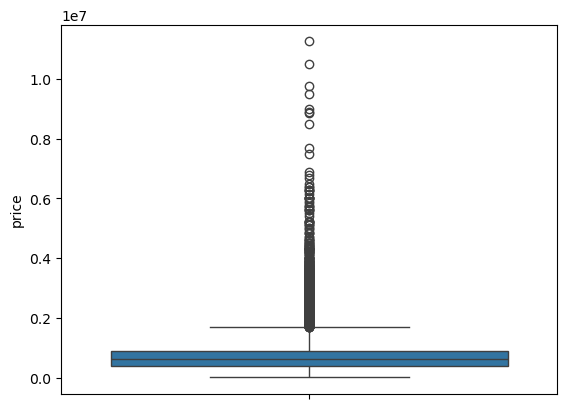

In [ ]:
sns.boxplot(df['price'])
plt.show()

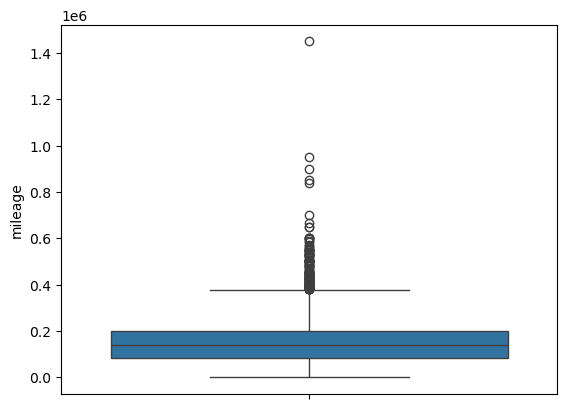

In [ ]:
sns.boxplot(df['mileage'])
plt.show()

In [ ]:
df.to_csv('cleaned_data.csv', index=False)

In [ ]:
df

,brand,model,price,year,mileage,city,transmission_type,color,fuel,date
0,Audi,Q3,2250000,2021,65000,6 أكتوبر,أتوماتيك,زيتوني,بنزين,2025-04-21
1,Mercedes,C 180,2650000,2022,38000,6 أكتوبر,أتوماتيك,ذهبي,بنزين,2025-04-21
3,Hyundai,Accent RB,705000,2019,27000,القاهرة,أتوماتيك,سماوى,بنزين,2025-04-21
4,Kia,Sportage,1400000,2021,68,الجيزة,أتوماتيك,فيراني,بنزين,2025-04-21
5,Hyundai,Tucson GDI,1250000,2020,146000,الزقازيق,أتوماتيك,رمادي,بنزين,2025-04-21
...,...,...,...,...,...,...,...,...,...,...
11404,Nissan,Sentra,485000,2013,133000,المقطم,أتوماتيك,بترولي,بنزين,2025-02-18
11405,Opel,Corsa,230000,2006,177000,أسوان,مانيوال,فضي,بنزين,2025-02-18
11406,Citroën,C5,570000,2014,190000,6 أكتوبر,أتوماتيك,موكا,بنزين,2025-01-26
11407,Citroën,C4 Picasso,480000,2013,177000,6 أكتوبر,أتوماتيك,احمر غامق,بنزين,2025-01-26


## Data Visualization

In this section, we visualize the cleaned data to gain insights into the relationships between different features and the distribution of car prices. We will explore:
- Price depreciation over time.
- Average prices across different brands and cities.
- The distribution of transmission and fuel types.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

data = pd.read_csv('cleaned_data.xls')
plt.rcParams['font.family'] = 'Arial'

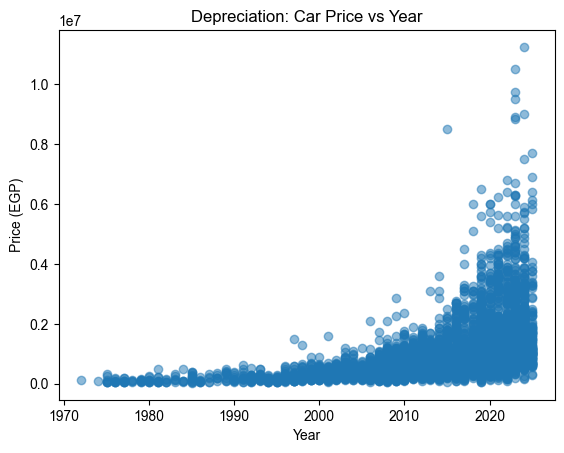

In [3]:
plt.scatter(data['year'], data['price'], alpha=0.5)
plt.title('Depreciation: Car Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price (EGP)')
#plt.grid(True)
plt.show()

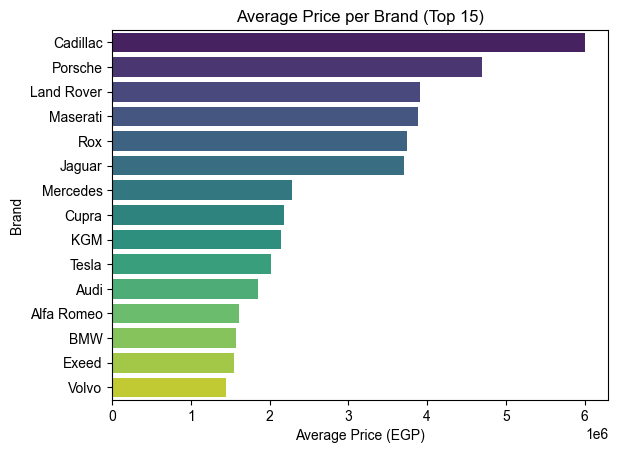

In [4]:
# Bar Plot: Average Price per Brand
brand_avg = data.groupby('brand')['price'].mean().sort_values(ascending=False).head(15)
colors = sns.color_palette("viridis", n_colors=len(brand_avg))
# تحويل أسماء الماركات للعرض الصحيح
#reshaped_labels = [get_display(arabic_reshaper.reshape(str(brand))) for brand in brand_avg.index]
sns.barplot(x=brand_avg.values, y=brand_avg.index, palette=colors, hue=brand_avg.index)
plt.title('Average Price per Brand (Top 15)')
plt.xlabel('Average Price (EGP)')
plt.ylabel('Brand')
plt.show()

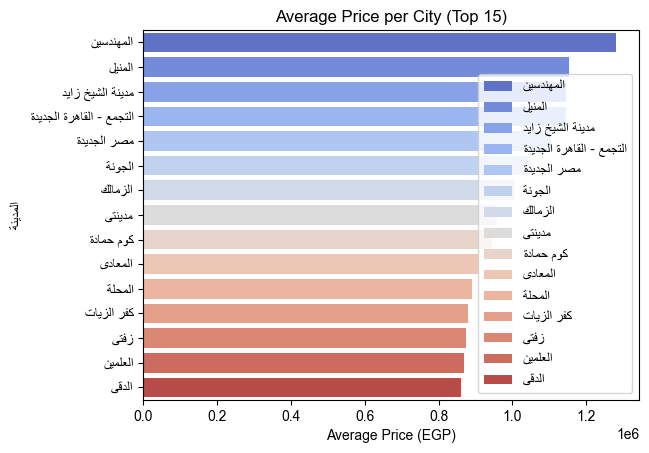

In [6]:
# Bar Plot: Average Price per City
city_avg = data.groupby('city')['price'].mean().sort_values(ascending=False).head(15)
colors = sns.color_palette("coolwarm", n_colors=len(city_avg) )
reshaped_labels = [get_display(arabic_reshaper.reshape(str(city))) for city in city_avg.index]
sns.barplot(x=city_avg.values, y=reshaped_labels, palette=colors,hue=reshaped_labels,legend=True )
plt.title('Average Price per City (Top 15)')
plt.xlabel('Average Price (EGP)')
plt.ylabel(get_display(arabic_reshaper.reshape('المدينة')))
plt.show()


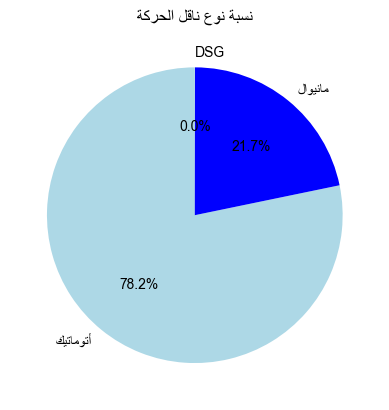

In [7]:
# Pie Chart: Transmission Type Share
labels = [get_display(arabic_reshaper.reshape(str(label))) for label in data['transmission_type'].value_counts().index]
sizes = data['transmission_type'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'blue'])
plt.title(get_display(arabic_reshaper.reshape('نسبة نوع ناقل الحركة')))
plt.show()

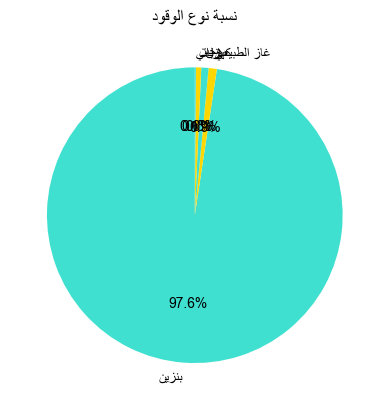

In [8]:
# Pie Chart: Fuel Type Share
labels = [get_display(arabic_reshaper.reshape(str(label))) for label in data['fuel'].value_counts().index]
sizes = data['fuel'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['turquoise', 'gold'])
plt.title(get_display(arabic_reshaper.reshape('نسبة نوع الوقود')))
plt.show() 

## Regression Model for Price Prediction

This section focuses on building a regression model to predict used car prices based on their features. The process involves:
1.  **Feature Selection:** Choosing relevant features.
2.  **Feature Engineering:** Creating new features (like car age) and transforming existing ones (handling outliers, encoding categorical variables, log transformation).
3.  **Handling Multicollinearity:** Checking for high correlation between features using VIF.
4.  **Data Scaling:** Standardizing features.
5.  **Polynomial Features:** Adding interaction terms.
6.  **Model Training:** Splitting data and training a Ridge Regression model.
7.  **Model Evaluation:** Assessing performance using R-squared and MAE, and performing cross-validation.
8.  **Comparison:** Training and evaluating an XGBoost model for comparison.

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [11]:
data = pd.read_csv('cleaned_data.xls')

In [12]:
# select features
features = ['brand', 'model', 'year', 'mileage', 'price', 'transmission_type', 'city']
df = data[features]
df.head()

,brand,model,year,mileage,price,transmission_type,city
0,Audi,Q3,2021,65000,2250000,أتوماتيك,6 أكتوبر
1,Mercedes,C 180,2022,38000,2650000,أتوماتيك,6 أكتوبر
2,Hyundai,Accent RB,2019,27000,705000,أتوماتيك,القاهرة
3,Kia,Sportage,2021,68,1400000,أتوماتيك,الجيزة
4,Hyundai,Tucson GDI,2020,146000,1250000,أتوماتيك,الزقازيق


In [13]:
# Handle outliers (cap at 1st and 99th percentiles)
df.loc[:, 'price'] = df['price'].clip(lower=df['price'].quantile(0.01), upper=df['price'].quantile(0.99)).astype(float)
df.loc[:, 'mileage'] = df['mileage'].clip(lower=df['mileage'].quantile(0.01), upper=df['mileage'].quantile(0.99)).astype(float)

C:\Users\KH&H\AppData\Local\Temp\ipykernel_4056\3883003115.py:3: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'mileage'] = df['mileage'].clip(lower=df['mileage'].quantile(0.01), upper=df['mileage'].quantile(0.99)).astype(float)


In [15]:
# add age
current_year = 2025
df.loc[:, 'age'] = current_year - df['year']
df.head()

,brand,model,year,mileage,price,transmission_type,city,age
0,Audi,Q3,2021,65000,2250000,أتوماتيك,6 أكتوبر,4
1,Mercedes,C 180,2022,38000,2650000,أتوماتيك,6 أكتوبر,3
2,Hyundai,Accent RB,2019,27000,705000,أتوماتيك,القاهرة,6
3,Kia,Sportage,2021,1000,1400000,أتوماتيك,الجيزة,4
4,Hyundai,Tucson GDI,2020,146000,1250000,أتوماتيك,الزقازيق,5


In [16]:
# get rare models (< 5 occurences)
model_counts = df['model'].value_counts()
rare_models = model_counts[model_counts < 5].index
df.loc[:, 'model'] = df['model'].apply(lambda x: 'Rare_Model' if x in rare_models else x)
df.head()

,brand,model,year,mileage,price,transmission_type,city,age
0,Audi,Q3,2021,65000,2250000,أتوماتيك,6 أكتوبر,4
1,Mercedes,C 180,2022,38000,2650000,أتوماتيك,6 أكتوبر,3
2,Hyundai,Accent RB,2019,27000,705000,أتوماتيك,القاهرة,6
3,Kia,Sportage,2021,1000,1400000,أتوماتيك,الجيزة,4
4,Hyundai,Tucson GDI,2020,146000,1250000,أتوماتيك,الزقازيق,5


In [17]:
# Encode transmission_type (handle unexpected values)
valid_transmissions = {'أتوماتيك': 1, 'مانيوال': 0}
df.loc[:, 'transmission_type'] = df['transmission_type'].map(valid_transmissions)
# If there are NaNs due to unmapped values, fill with mode (most common transmission)
if df['transmission_type'].isna().any():
    print("Warning: Unmapped transmission_type values found. Filling with mode.")
    df.loc[:, 'transmission_type'] = df['transmission_type'].fillna(df['transmission_type'].mode()[0])

C:\Users\KH&H\AppData\Local\Temp\ipykernel_4056\3125138270.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'transmission_type'] = df['transmission_type'].fillna(df['transmission_type'].mode()[0])


In [18]:
df.head()

,brand,model,year,mileage,price,transmission_type,city,age
0,Audi,Q3,2021,65000,2250000,1.0,6 أكتوبر,4
1,Mercedes,C 180,2022,38000,2650000,1.0,6 أكتوبر,3
2,Hyundai,Accent RB,2019,27000,705000,1.0,القاهرة,6
3,Kia,Sportage,2021,1000,1400000,1.0,الجيزة,4
4,Hyundai,Tucson GDI,2020,146000,1250000,1.0,الزقازيق,5


In [19]:
# Target encoding for brand, model, and city
brand_mean = df.groupby('brand')['price'].mean()
model_mean = df.groupby('model')['price'].mean()
city_mean = df.groupby('city')['price'].mean()
df.loc[:, 'brand_encoded'] = df['brand'].map(brand_mean)
df.loc[:, 'model_encoded'] = df['model'].map(model_mean)
df.loc[:, 'city_encoded'] = df['city'].map(city_mean)

C:\Users\KH&H\AppData\Local\Temp\ipykernel_4056\1150462924.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'brand_encoded'] = df['brand'].map(brand_mean)


In [20]:
# Log-transform mileage
df.loc[:, 'mileage_log'] = np.log1p(df['mileage'])

In [21]:
# Drop original columns
df = df.drop(['brand', 'model', 'year', 'mileage', 'city'], axis=1)

In [22]:
df.head()

,price,transmission_type,age,brand_encoded,model_encoded,city_encoded,mileage_log
0,2250000,1.0,4,1.755635e+06,2.068333e+06,778968.671679,11.082158
1,2650000,1.0,3,2.111376e+06,1.949072e+06,778968.671679,10.545368
2,705000,1.0,6,7.111388e+05,6.774792e+05,819582.689039,10.203629
3,1400000,1.0,4,8.832876e+05,1.503322e+06,603773.807143,6.908755
4,1250000,1.0,5,7.111388e+05,1.324333e+06,735269.651685,11.891369


In [23]:
# Features and target
X = df.drop('price', axis=1)
y = df['price']

# Ensure all features are numeric
X = X.astype(float)


In [24]:
# Check for multicollinearity
print("Correlation Matrix:")
print(X.corr())

Correlation Matrix:
                   transmission_type       age  brand_encoded  model_encoded  \
transmission_type           1.000000 -0.425470       0.276424       0.367816   
age                        -0.425470  1.000000      -0.068453      -0.343803   
brand_encoded               0.276424 -0.068453       1.000000       0.660800   
model_encoded               0.367816 -0.343803       0.660800       1.000000   
city_encoded                0.204422 -0.208651       0.203271       0.239623   
mileage_log                -0.185931  0.486367      -0.147847      -0.317113   

                   city_encoded  mileage_log  
transmission_type      0.204422    -0.185931  
age                   -0.208651     0.486367  
brand_encoded          0.203271    -0.147847  
model_encoded          0.239623    -0.317113  
city_encoded           1.000000    -0.131985  
mileage_log           -0.131985     1.000000  


In [25]:
# lets check the var infalation values for each coeff (defines multicolinearity), helps you to decide wether to remove a featur or not
try:
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print("\nVariance Inflation Factor (VIF):")
    print(vif_data)
except Exception as e:
    print(f"Warning: VIF calculation failed: {e}")
    print("Proceeding without VIF.")



Variance Inflation Factor (VIF):
             Feature        VIF
0  transmission_type   6.197620
1                age   4.695791
2      brand_encoded   9.034560
3      model_encoded   6.971000
4       city_encoded  20.029486
5        mileage_log  28.433216


In [28]:
# Scale all features by mean
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [27]:
# Add polynomial features (interaction terms only)
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_poly = poly.fit_transform(X)
poly_feature_names = poly.get_feature_names_out(X.columns)

In [29]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [30]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

alphas = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
best_r2 = 0
best_alpha = 0
best_mae = float('inf')
best_model = None

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"\nRidge Regression (alpha={alpha}):")
    print(f"R-squared (actual): {r2}")
    print(f"Mean Absolute Error: {mae:.2f}")
    
    if r2 > best_r2 or (abs(r2 - best_r2) < 1e-2 and mae < best_mae):
        best_r2 = r2
        best_alpha = alpha
        best_mae = mae
        best_model = ridge_model


Ridge Regression (alpha=0.01):
R-squared (actual): 0.8506513566710707
Mean Absolute Error: 142228.69

Ridge Regression (alpha=0.1):
R-squared (actual): 0.850651336503716
Mean Absolute Error: 142227.84

Ridge Regression (alpha=1.0):
R-squared (actual): 0.850651127685359
Mean Absolute Error: 142219.27

Ridge Regression (alpha=10.0):
R-squared (actual): 0.850648330222147
Mean Absolute Error: 142134.60

Ridge Regression (alpha=100.0):
R-squared (actual): 0.8505542013348516
Mean Absolute Error: 141346.82

Ridge Regression (alpha=1000.0):
R-squared (actual): 0.8456273611266787
Mean Absolute Error: 138798.70

Ridge Regression (alpha=10000.0):
R-squared (actual): 0.7565368692107239
Mean Absolute Error: 199045.30


In [31]:
print(f"\nBest Ridge Model (alpha={best_alpha}):")
print(f"R-squared: {best_r2:.2f}")
print(f"Mean Absolute Error: {best_mae:.2f}")


Best Ridge Model (alpha=1000.0):
R-squared: 0.85
Mean Absolute Error: 138798.70


In [32]:
# Cross-validation for best model
cv_scores = cross_val_score(Ridge(alpha=best_alpha), X_poly, y, cv=10, scoring='r2')
print(f"\nCross-Validation R-squared (alpha={best_alpha}):")
print(cv_scores)
print(f"Mean R-squared: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")


Cross-Validation R-squared (alpha=1000.0):
[0.8383129  0.85746647 0.81786752 0.85590969 0.83110162 0.86500318
 0.86300301 0.85926646 0.84201428 0.85839541]
Mean R-squared: 0.85 (+/- 0.03)


In [33]:

# Coefficients for best model
coefficients = pd.DataFrame({
    'Feature': poly_feature_names,
    'Coefficient': best_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients (Best Ridge Model):")
print(coefficients)


Feature Coefficients (Best Ridge Model):
                            Feature    Coefficient
3                     model_encoded  246652.997833
2                     brand_encoded  157781.291385
0                 transmission_type   58289.401329
16       brand_encoded city_encoded   27615.012128
4                      city_encoded   26763.251741
8   transmission_type model_encoded   26632.841661
7   transmission_type brand_encoded   10387.786004
14                  age mileage_log    6484.482354
6             transmission_type age   -1121.175761
18       model_encoded city_encoded   -3836.566560
9    transmission_type city_encoded   -6394.985070
13                 age city_encoded  -10884.307757
20         city_encoded mileage_log  -11107.033644
10    transmission_type mileage_log  -12568.352395
15      brand_encoded model_encoded  -15507.432070
17        brand_encoded mileage_log  -21656.569223
19        model_encoded mileage_log  -25465.579614
11                age brand_encoded  -42

In [34]:
# lets try another model
from xgboost import XGBRegressor # type: ignore
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(f"XGBoost R-squared: {r2_score(y_test, y_pred_xgb):.2f}")
print(f"XGBoost MAE: {mean_absolute_error(y_test, y_pred_xgb):.2f}")

XGBoost R-squared: 0.91
XGBoost MAE: 97472.49
